In [3]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def get_data(query,columns):
    try:
        conn = psycopg2.connect("dbname='bda-2022-nextbike-data' user='postgres' host='34.118.39.208' password='bda-2022-postgres'")
    except:
        print('I am unable to connect to the database')
        return None
    cursor = conn.cursor()
    cursor.execute(query)
    rows = cursor.fetchall()
    data = pd.DataFrame(list(rows))
    data.columns = columns
    return data

# Rentals per population
```
- We decided to analyze the dependency between rentals and population
- From the plot we can see that the rentals per population indicator is the highest in Bonn and the lowest in Delhi
- We cannot see the trend, that indicates that there is a simple dependency between rentals and population.
```

In [20]:
data = get_data("""select city_name, count(returned) as returned_count, count(collected) as collected_count, 
population, cast(count(collected) as float)/population as rentals_per_pop from intervals_usage 
join cities_populations on city_name = city or (city_name='KielRegion' and city='Kiel')
group by city_name, population
      """,['city name','returned_count','collected_count', 'population','rentals per population'])
data = data.sort_values(by = 'population')

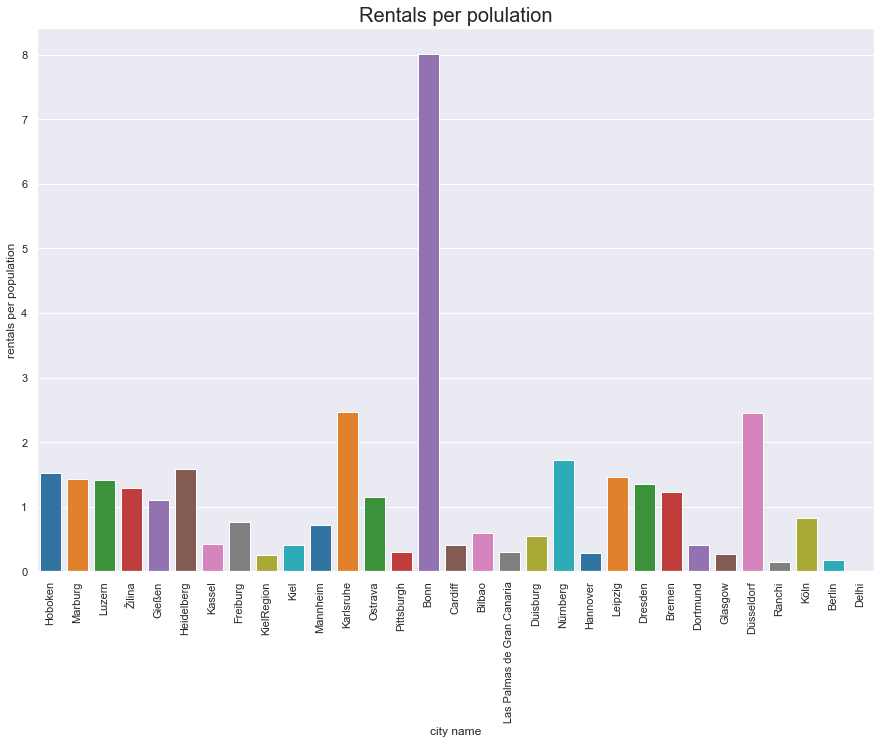

In [17]:
plt.figure(figsize=(15, 10))
sns.set_theme(style="darkgrid")
g = sns.barplot(data = data,x ='city name',y = 'rentals per population',palette="tab10")
g.axes.set_title(label = f"Rentals per polulation",
fontsize = 20)
g.tick_params(axis='x', rotation=90)
plt.show()

# Rentals per population with day night division
- in the next step we decided to check if there is how the indicator changes during day and night
- as expected in the day the indicator is higher (people rent more bikes)
- there is also no connection between 

In [5]:
query = '''select city_name, count(returned) as returned_count, count(collected) as collected_count, 
population, cast(count(collected) as float)/population as rentals_per_pop,
extract(hour from timestamp_start) >= 8 and extract(hour from timestamp_start) <= 20 as is_day
from intervals_usage 
join cities_populations on city_name = city or (city_name='KielRegion' and city='Kiel')
group by city_name, population, is_day
order by population'''
columns = ['city name','returned_count','collected_count','population','rentals per population','is_day']

data = get_data(query,columns)


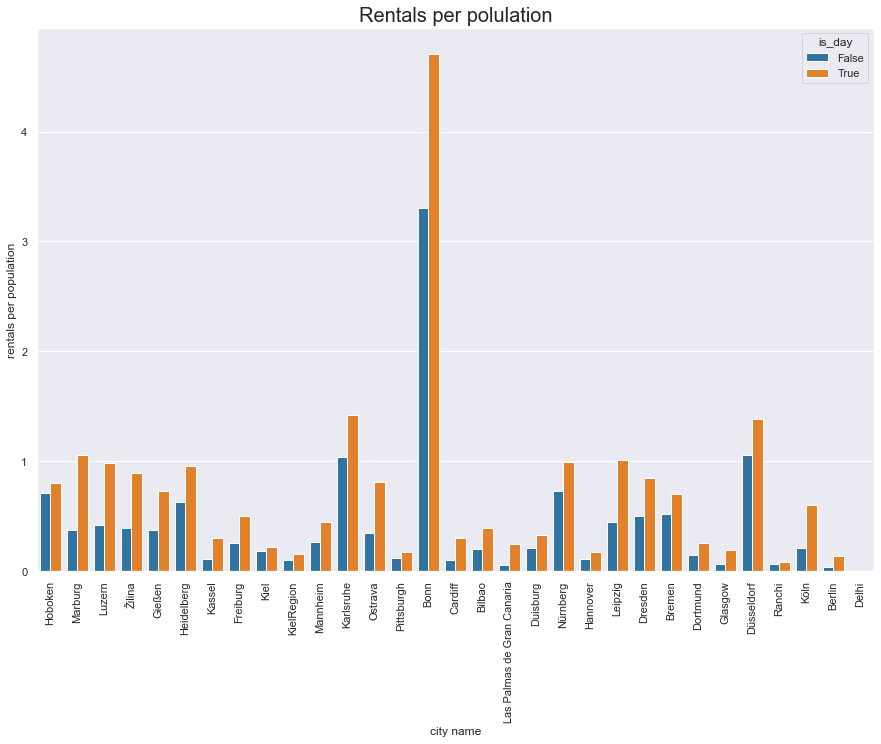

In [30]:
plt.figure(figsize=(15, 10))
sns.set_theme(style="darkgrid")
g = sns.barplot(data = data,x ='city name',y = 'rentals per population',hue = 'is_day',palette="tab10")
g.axes.set_title(label = f"Rentals per polulation",
fontsize = 20)
g.tick_params(axis='x', rotation=90)
plt.show()

# Diffrence betwwen day and night
```
- the next thing we decided to analyze is the difference between the rentals during the day and night
- to make the data more comparable we divided the difference by the rentals per population column
- based on the graph, we cannot see any trends
- the biggest difference can be seen in Las Palmas de Gran Canaria 
```

In [7]:
data['difference'] = data['rentals per population'].diff()
diff_df = data.iloc[1::2,:]

In [14]:
diff_df['diff'] = diff_df['difference']/diff_df['rentals per population']

C:\Users\gosia\AppData\Local\Temp/ipykernel_25272/3763277725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_df['diff'] = diff_df['difference']/diff_df['rentals per population']


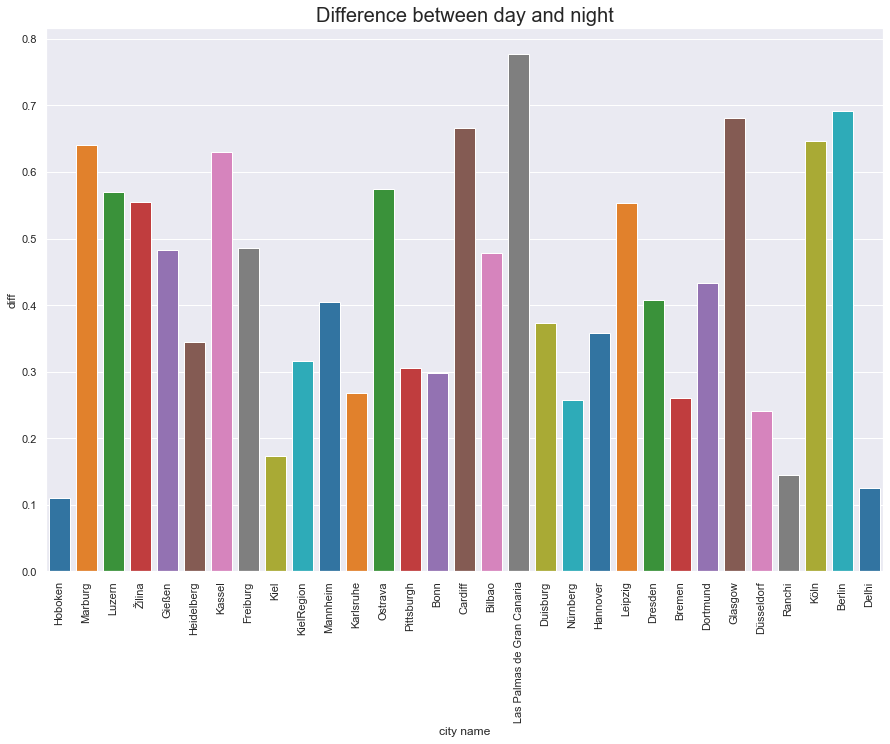

In [15]:
plt.figure(figsize=(15, 10))
sns.set_theme(style="darkgrid")
g = sns.barplot(data = diff_df,x ='city name',y = 'diff',palette="tab10")
g.axes.set_title(label = f"Difference between day and night",
fontsize = 20)
g.tick_params(axis='x', rotation=90)
plt.show()